<a href="https://colab.research.google.com/github/pdh93621/Deep-learning/blob/NLP/Image%26PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=acd9c589d184262863ad4b94c799d061765e31b4963ea7c2cf6bfd54440dd7f4
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [2]:
!pip install -upgrade pip


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [4]:
from pytesseract import pytesseract
from PIL import Image

In [5]:
def load_image(path, mode = ''):
  return Image.open(path)

In [6]:
def run_pytesseract(image, path_engine, config='-I eng'):
  pytesseract.tesseract_cmd = path_engine
  result = pytesseract.image_tostring(image, config = config)
  return result

In [7]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow

In [8]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,049 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [9]:
image = cv2.imread('/content/drive/MyDrive/dataset/test.jpg')

In [10]:
print(image)

[[[ 76  92 109]
  [ 70  86 103]
  [ 77  93 109]
  ...
  [127 128 132]
  [131 132 136]
  [135 136 140]]

 [[ 79  95 112]
  [ 72  88 105]
  [ 78  94 110]
  ...
  [129 130 134]
  [131 132 136]
  [134 135 139]]

 [[ 80  96 113]
  [ 73  89 106]
  [ 77  93 109]
  ...
  [131 132 136]
  [131 132 136]
  [132 133 137]]

 ...

 [[ 49  75  89]
  [ 51  77  91]
  [ 52  78  92]
  ...
  [ 36  51  67]
  [ 40  55  71]
  [ 40  55  71]]

 [[ 51  77  91]
  [ 51  77  91]
  [ 52  78  92]
  ...
  [ 38  53  69]
  [ 41  56  72]
  [ 39  54  70]]

 [[ 53  79  93]
  [ 52  78  92]
  [ 51  77  91]
  ...
  [ 45  60  76]
  [ 48  63  79]
  [ 46  61  77]]]


In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
filename = f'{os.getpid()}.png'
cv2.imwrite(filename, gray)

True

In [13]:
# pytesseract의 image to string을 써주고, 숫자는 lang = 'none'
text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

In [14]:
print(text)

 

Wwivri

aee

IGA 5G Wave2 2A1B

>> KT G

PW >> 8hg79eh832

        
 

OlSGnAMg!

Olu
fal

 



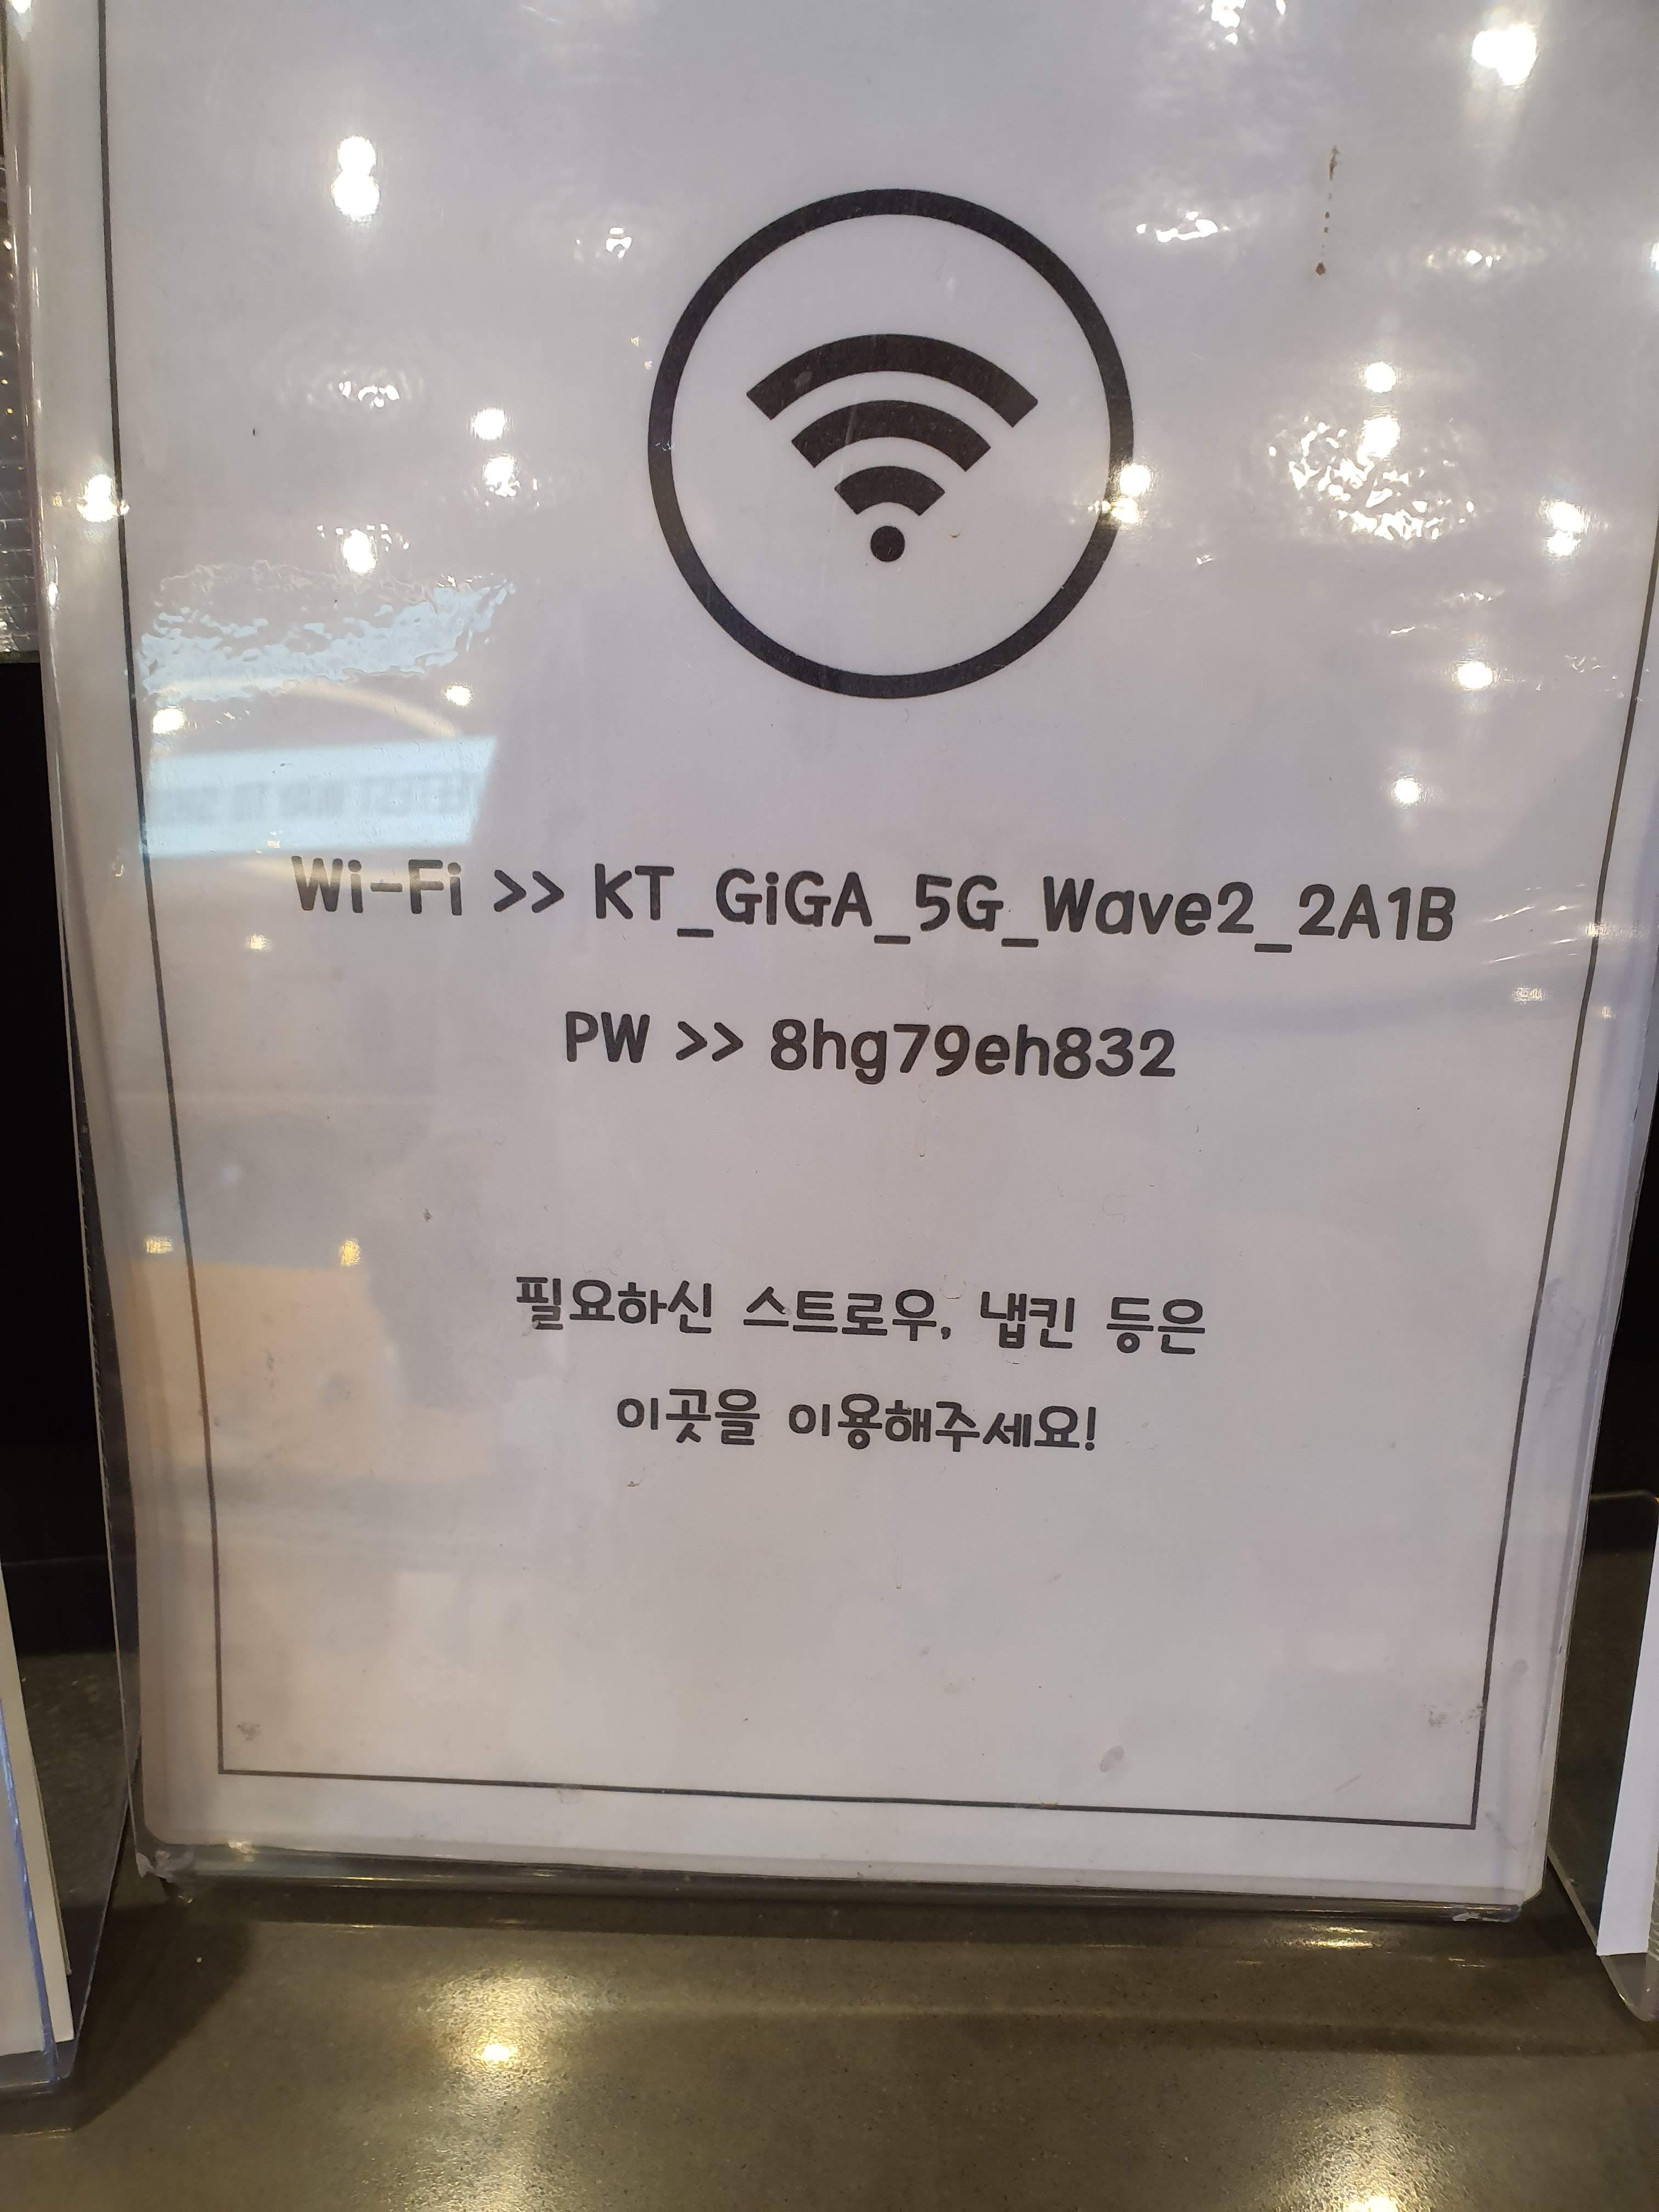

In [15]:
cv2_imshow(image)

 ### PDF에서 글 추출하기

In [16]:
!pip install pdfminer

     |████████████████████████████████| 4.2MB 8.0MB/s 
     |████████████████████████████████| 1.9MB 36.9MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-cp37-none-any.whl size=6140102 sha256=5d149aeec56bf14514602ccceebaddbfd68632afd9bfc17633786ba75092ebe7
  Stored in directory: /root/.cache/pip/wheels/e1/00/af/720a55d74ba3615bb4709a3ded6dd71dc5370a586a0ff6f326
Successfully built pdfminer


In [17]:
from io import StringIO
import pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [20]:
def convert_pdf2txt(path):
  manager = PDFResourceManager()
  file_object = StringIO()
  converter = TextConverter(manager, file_object, laparams=LAParams())
  with open(path, 'rb') as f:
    interpreter = PDFPageInterpreter(manager, converter)
    for page in PDFPage.get_pages(f, maxpages=0, caching=True, check_extractable=True):
      interpreter.process_page(page)
  converter.close()
  text = file_object.getvalue()
  file_object.close()
  return text

In [21]:
convert_pdf2txt('/content/drive/MyDrive/dataset/sample_papers.pdf')

"지역사회간호학회지 제24권 제1호, 2013년 3월\nJ Korean Acad Community Health Nurs Vol. 24 No. 1, 1-10, March 2013\n\nISSN 1225-9594\nhttp://dx.doi.org/10.12799/jkachn.2013.24.1.1\n\n지역사회거주 노인의 황반변성 관련 요인\n\n김철규1·박윤경2·박승미3\n\n청주대학교 간호학과1, 한국실명예방재단2, 호서대학교 간호학과 ‧ 기초과학연구소3\n\nFactors Associated with Senile Macular Degeneration in Elders within \n\nCommunities\n\nKim, Chul-Gyu1 · Park, Yungeong2 · Park, Seungmi3\n\n1Department of Nursing, Cheongju University, Cheongju\n2Korean Foundation for the Prevention of Blindness, Seoul\n\n3Department of Nursing‧ Research Institute for Basic Sciences, Hoseo University, Asan, Korea\n\nPurpose: This study was conducted to examine the degree of senile macular degeneration in elders aged 65 or \nolder and identify factors associated with senile macular degeneration in elders within communities. Methods: \nParticipants in this cross-sectional descriptive study were 388 elders without cataract, glaucoma, and diabetic \nretinopathy. Data were collected through face to fac

In [22]:
!pip install pdfplumber

     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 5.6MB 10.6MB/s 
     |████████████████████████████████| 143kB 33.0MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-cp37-none-any.whl size=32241 sha256=43b46f177976a8dcf2ab9736ceb067da0cb7150e1ef06d7473f12a9b521afa96
  Stored in directory: /root/.cache/pip/wheels/5a/9b/3d/37e37d93650be964fdd2a9babf174214fec8a0f4d222d474ab
Successfully built pdfplumber


In [23]:
import pdfplumber

text = ''
with pdfplumber.open('/content/drive/MyDrive/dataset/sample_papers.pdf') as pdf:
  for page in pdf.pages:
    text += page.extract_text()

text

"지역사회간호학회지 제24권 제1호, 2013년 3월 ISSN 1225-9594\nJ Korean Acad Community Health Nurs Vol. 24 No. 1, 1-10, March 2013 http://dx.doi.org/10.12799/jkachn.2013.24.1.1\n지역사회거주 노인의 황반변성 관련 요인\n김철규1·박윤경2·박승미3\n‧\n청주대학교 간호학과1, 한국실명예방재단2, 호서대학교 간호학과 기초과학연구소3\nFactors Associated with Senile Macular Degeneration in Elders within \nCommunities\nKim, Chul-Gyu1 · Park, Yungeong2 · Park, Seungmi3\n1Department of Nursing, Cheongju University, Cheongju\n2Korean‧ Foundation for the Prevention of Blindness, Seoul\n3Department of Nursing Research Institute for Basic Sciences, Hoseo University, Asan, Korea\nPurpose: This study was conducted to examine the degree of senile macular degeneration in elders aged 65 or \nolder and identify factors associated with senile macular degeneration in elders within communities. Methods: \nParticipants in this cross-sectional descriptive study were 388 elders without cataract, glaucoma, and diabetic \nretinopathy. Data were collected through face to face interviews using a 